## Student Data Exploration

This dataframe contains over 30k entries. 
It includes 
 - Student id
 - Student country
 - Date of registration.

#### Questions

 - Which is the most & least represented country?
     - Could be compared against previous year's data to understand trend and focus resources
     - Understand the relationship between representation here and having sought help in the hub?
 - How is the date of registration spread?
     - Are there different groupings of date of registration for different countries? (Check against Ad campaigns and discounts to understand effectiveness)
 

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import import_ipynb
import collections

In [3]:
student_info = pd.read_csv('dataSets/365_database/365_student_info.csv')

student_info.head()

# student_info.info()
    
# student_info.shape


,student_id,student_country,date_registered
0,258798,IN,2022-01-01
1,258799,CO,2022-01-01
2,258800,CA,2022-01-01
3,258801,IN,2022-01-01
4,258802,US,2022-01-01


Only the country column has missing values.

In [4]:
student_info_cleaned = student_info.dropna()
student_info_cleaned['student_id']

0        258798
1        258799
2        258800
3        258801
4        258802
          ...  
35225    295511
35226    295512
35227    295513
35228    295514
35229    295515
Name: student_id, Length: 35217, dtype: int64

Cleaned the original dataframe by removing rows with missing values for country.

In [5]:
country_frequency = (student_info_cleaned['student_country'].value_counts())
country_frequency

IN    6933
US    4768
EG    3003
GB    1748
NG    1718
      ... 
SR       1
RE       1
BI       1
GY       1
BM       1
Name: student_country, Length: 180, dtype: int64

The value_count() function returns a series of unique values in a  column and the frequency of their occurrence.

By applying it on the country column 
    <mark> student_info_cleaned['student_country'].value_counts() </mark>
we are able to return a series containing a list of countries and how often they appear in the dataframe.

This series is contained in a variable which is then be used to create a dataframe.

In [6]:
student_by_countries = pd.DataFrame(country_frequency).reset_index().rename(columns={'index':'Country','student_country':'No,of students'})

student_by_countries


,Country,"No,of students"
0,IN,6933
1,US,4768
2,EG,3003
3,GB,1748
4,NG,1718
...,...,...
175,SR,1
176,RE,1
177,BI,1
178,GY,1


The above cell:
 - Creates a dataframe using the series from the preceding cell.
 - Resets the index: It adds the previous index (country name) to the dataframe as a column. and replaces it with a conventional index.
 - Renames the column for quicker understanding.

The dataframe itself contains in descending order countries most represented to least represented. For us, this shows where most of our students population is from, and where the least is from as well.

Looking at the top five rows I got an idea.

It would be worth looking at the distribution of student representation by country.

I will be adding another column to the dataframe to represent in percentage the student population from each country.

For this, I will write a script to calculate percentage from one country's representation in the sample.

And create a function out of the script with conditional logic, probably a while-loop.

The function will return a list to create a dataframe which will be concatenated with the student_info dataframe.

This will make obvious the break-down of individual country's representation in the population.

In [7]:
def percentCalc():
    n = 0
    global percent
    percent = []

    total_students = student_by_countries['No,of students'].sum()

    total_countries = len(student_by_countries)

    while n < total_countries:
        
        weight = round((((student_by_countries['No,of students'].loc[n])/total_students)*100),3)

        percent.append(weight)
    
        n = n + 1
    return percent

percentCalc()

[19.687,
 13.539,
 8.527,
 4.964,
 4.878,
 3.351,
 2.788,
 2.039,
 1.672,
 1.604,
 1.44,
 1.377,
 1.357,
 1.266,
 1.258,
 1.227,
 1.195,
 1.159,
 1.107,
 1.028,
 0.98,
 0.951,
 0.948,
 0.883,
 0.877,
 0.855,
 0.761,
 0.73,
 0.71,
 0.653,
 0.645,
 0.576,
 0.545,
 0.545,
 0.534,
 0.531,
 0.528,
 0.466,
 0.446,
 0.423,
 0.358,
 0.349,
 0.341,
 0.335,
 0.327,
 0.312,
 0.312,
 0.31,
 0.27,
 0.264,
 0.264,
 0.236,
 0.236,
 0.233,
 0.233,
 0.23,
 0.224,
 0.224,
 0.199,
 0.19,
 0.187,
 0.179,
 0.176,
 0.17,
 0.168,
 0.165,
 0.156,
 0.148,
 0.133,
 0.131,
 0.125,
 0.116,
 0.114,
 0.108,
 0.108,
 0.105,
 0.105,
 0.105,
 0.099,
 0.094,
 0.088,
 0.088,
 0.085,
 0.085,
 0.085,
 0.082,
 0.077,
 0.074,
 0.074,
 0.074,
 0.062,
 0.062,
 0.062,
 0.062,
 0.062,
 0.062,
 0.06,
 0.06,
 0.057,
 0.057,
 0.054,
 0.051,
 0.048,
 0.045,
 0.045,
 0.043,
 0.043,
 0.043,
 0.04,
 0.037,
 0.037,
 0.037,
 0.034,
 0.034,
 0.031,
 0.028,
 0.028,
 0.026,
 0.026,
 0.026,
 0.026,
 0.026,
 0.026,
 0.023,
 0.023,
 0.023,
 0

The cell above describes a function which calculates returns a list containing 180 floating point number, each one of them corresponds to a country in order as presented in the student_by_countries Dataframe.

In [8]:
def dfMaker(data:list):
    df = pd.DataFrame(data, columns = ['Percent'])

    frames = [student_by_countries, df]
    
    global percent_Breakdown
    percent_Breakdown = pd.concat(frames,axis = 1)

    return percent_Breakdown

dfMaker(percentCalc())

,Country,"No,of students",Percent
0,IN,6933,19.687
1,US,4768,13.539
2,EG,3003,8.527
3,GB,1748,4.964
4,NG,1718,4.878
...,...,...,...
175,SR,1,0.003
176,RE,1,0.003
177,BI,1,0.003
178,GY,1,0.003


In [9]:
percent_Breakdown['No,of students'].sum()

35217

In [10]:
percent_Breakdown['Percent'].sum()

100.01100000000001

In [11]:
registration_date = (student_info_cleaned['date_registered'].value_counts().to_dict())
# registration_date

In [12]:
registration_date_ordered = collections.OrderedDict(sorted(registration_date.items()))
# registration_date_ordered

<function matplotlib.pyplot.show(close=None, block=None)>

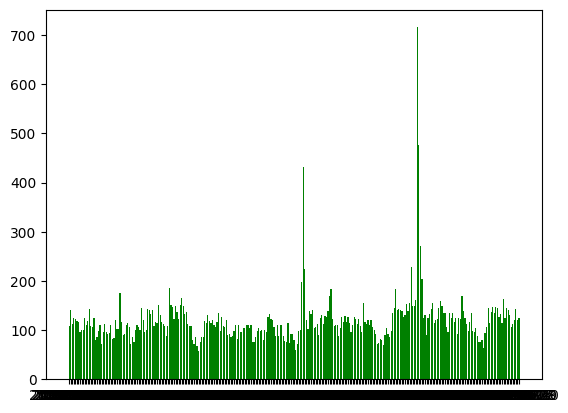

In [13]:
plt.bar(list(registration_date_ordered.keys()),registration_date_ordered.values(),color='g')
plt.show

In [16]:
df = student_info[student_info.isnull().any(axis=1)]
missing_country = df['student_id'].tolist()
missing_country

[261725,
 262665,
 272144,
 278827,
 282654,
 282914,
 283704,
 283791,
 284550,
 284790,
 286959,
 290648,
 293967]

In [17]:
print(len(student_info_cleaned))
country_Student = dict(zip(student_info_cleaned.student_id, student_info_cleaned.student_country))
print(len(country_Student))

35217
35217


In [19]:
student_info_cleaned['student_country'].value_counts()

IN    6933
US    4768
EG    3003
GB    1748
NG    1718
      ... 
SR       1
RE       1
BI       1
GY       1
BM       1
Name: student_country, Length: 180, dtype: int64